In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,Category,Message
2064,spam,"URGENT! Your mobile No *********** WON a £2,00..."
2986,ham,No break time one... How... I come out n get m...
3622,ham,That means from february to april i'll be gett...
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
1175,ham,Yay! You better not have told that to 5 other ...


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Cleaning

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Category'] = encoder.fit_transform(df['Category'])

In [9]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.duplicated().sum()

415

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5157, 2)

## 2. EDA

In [15]:
df['Category'].value_counts(normalize=True)*100

Category
0    87.570293
1    12.429707
Name: proportion, dtype: float64

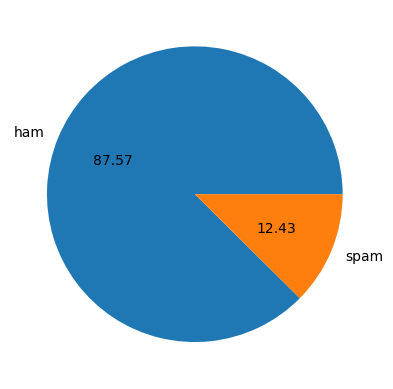

In [16]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HaqNa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['Message'].apply(len)

In [20]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.104324,18.560403,1.969750
std,58.384729,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869796,17.267715,1.827724
std,56.710489,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


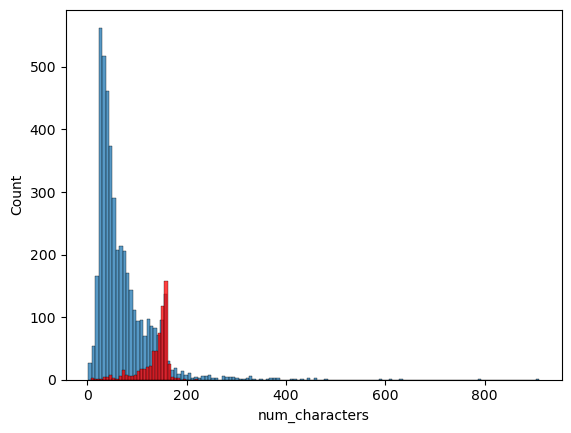

In [28]:
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'], color='red')
plt.show()

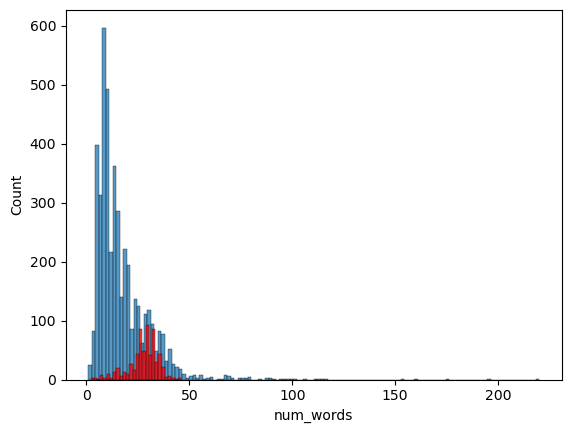

In [29]:
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'], color='red')
plt.show()

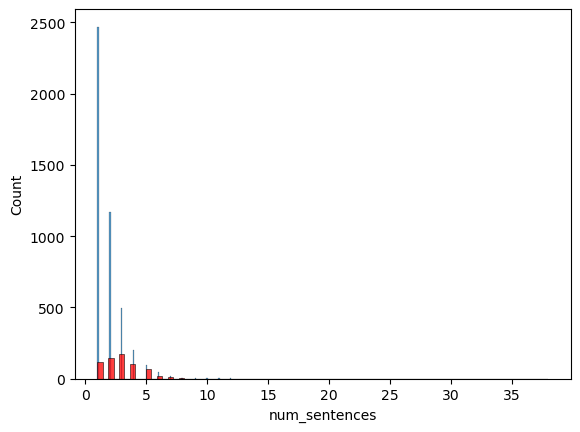

In [30]:
sns.histplot(df[df['Category'] == 0]['num_sentences'])
sns.histplot(df[df['Category'] == 1]['num_sentences'], color='red')
plt.show()

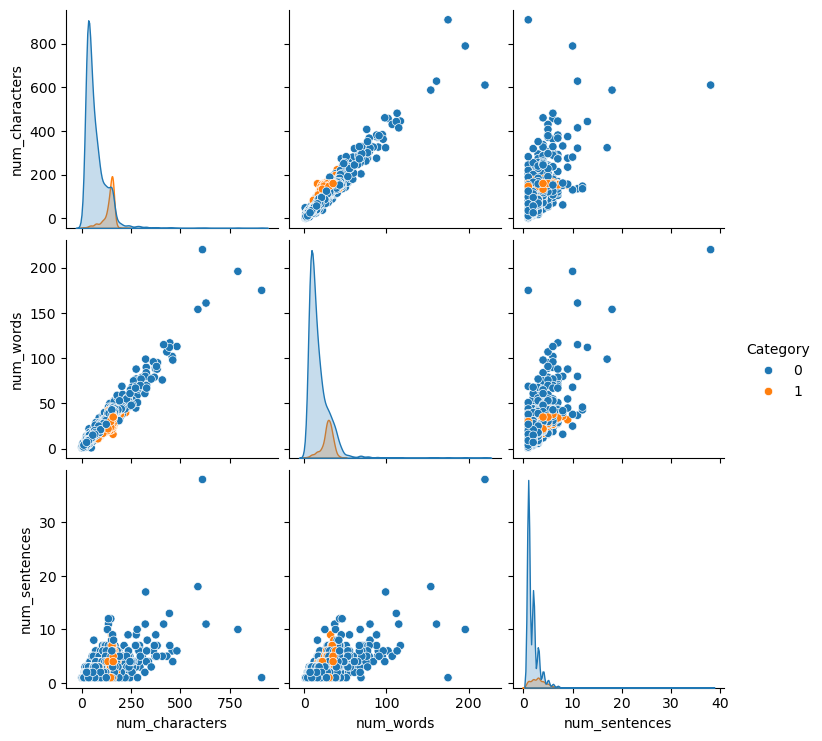

In [31]:
sns.pairplot(df, hue='Category')

In [32]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()

In [33]:
correlation

,Category,num_characters,num_words,num_sentences
Category,1.000000,0.374395,0.255968,0.259023
num_characters,0.374395,1.000000,0.966154,0.622413
num_words,0.255968,0.966154,1.000000,0.679396
num_sentences,0.259023,0.622413,0.679396,1.000000


<Axes: >

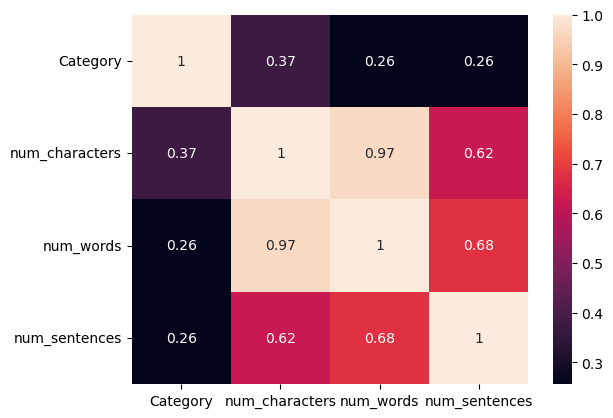

In [34]:
sns.heatmap(correlation, annot=True)

## 3. Data Preprocessing
<ul><Li>Lower case conversion</Li>
<li>Tokenization</li>
<li>Remove special characters</li>
<li>Remove stop words and punctuation</li>
<li>Stemming</li></ul>

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('drinking')

'drink'

In [53]:
nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HaqNa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
import string
#string.punctuation

In [98]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english'): #and i not in string.punctuation:
            y.append(i)

    #text = y[:]
    #y.clear()

    #for i in text:
        #y.append(ps.stem(i))
            
    return " ".join(y)

In [99]:
transform_text('I loved the youtube lectures on machine? learning!')

'loved youtube lectures machine learning'

In [100]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [101]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [102]:
!pip install wordcloud

In [103]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [104]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

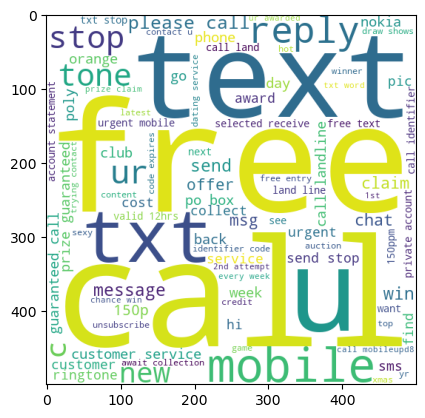

In [105]:
plt.imshow(spam_wc)
plt.show()

In [106]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))

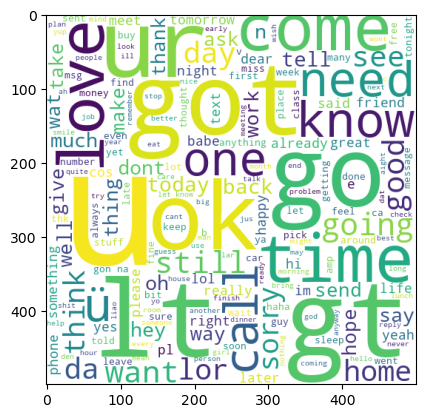

In [107]:
plt.imshow(ham_wc)
plt.show()

In [108]:
spam_corpus = []
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
         

In [109]:
len(spam_corpus)

9781

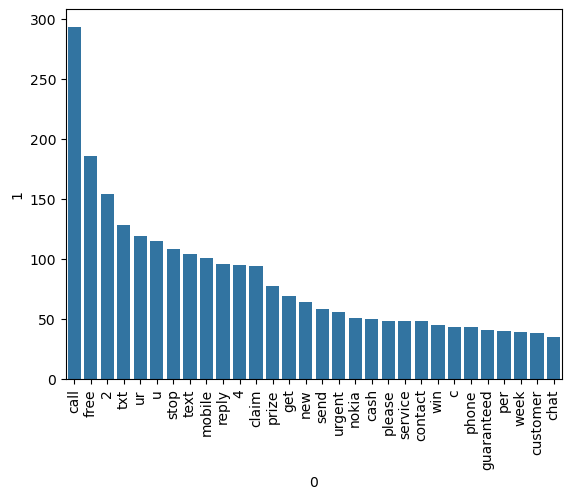

In [110]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df1[0], y= df1[1])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
ham_corpus = []
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
         

In [112]:
len(ham_corpus)

35940

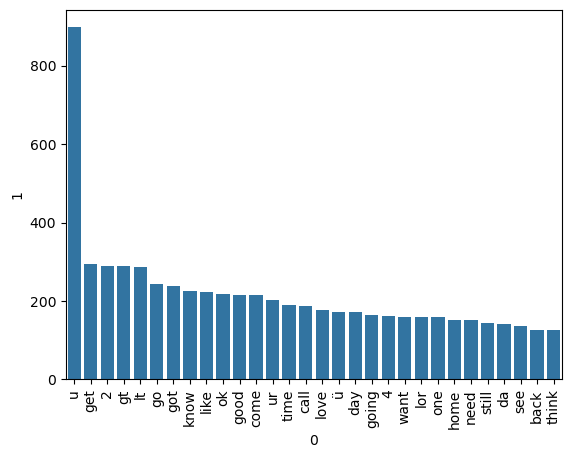

In [113]:
df1 = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=df1[0], y= df1[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
X=df['transformed_text']
y= df['Category'].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [118]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_vec= tfidf.fit_transform(X_train).toarray()
X_test_vec=tfidf.transform(X_test).toarray()

In [119]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [120]:
gnb = GaussianNB()
mnb =MultinomialNB()
bnb = BernoulliNB()

In [121]:
gnb.fit(X_train_vec, y_train)
y_pred1 = gnb.predict(X_test_vec)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1))

0.8546511627906976
[[772 133]
 [ 17 110]]
0.45267489711934156


In [122]:
mnb.fit(X_train_vec, y_train)
y_pred2 = mnb.predict(X_test_vec)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2))

0.9748062015503876
[[905   0]
 [ 26 101]]
1.0


In [123]:
bnb.fit(X_train_vec, y_train)
y_pred3 = bnb.predict(X_test_vec)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test, y_pred3))

0.9844961240310077
[[905   0]
 [ 16 111]]
1.0


In [127]:
message = tfidf.transform(['Congratulations you won the prize']).toarray()
result = mnb.predict(message)
print(result)

[1]


In [129]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))